两个数据结构：
pd.series
pd.dataframe


今日学习函数：
df.merge




df.groupby 按照给定key进行分组，返回一个键值对。键就是给定的key，值就是该分组构成的dataframe。

In [31]:
import pandas as pd
from pandas import DataFrame
df = DataFrame({'key1':list('ababa'),
                'key2': ['one','two','one','three','one'],
                'data1': np.arange(0, 5),
                'data2': np.arange(5, 10)})
df

,key1,key2,data1,data2
0,a,one,0,5
1,b,two,1,6
2,a,one,2,7
3,b,three,3,8
4,a,one,4,9


In [44]:
group = df.groupby(['key1'])
for key, value in group:
    print(key)
    print(value)
    print("")

a
  key1 key2  data1  data2
0    a  one      0      5
2    a  one      2      7
4    a  one      4      9

b
  key1   key2  data1  data2
1    b    two      1      6
3    b  three      3      8



In [45]:
group.size().where(lambda x : (2<x)&(x<4)).dropna().index.values

array(['a'], dtype=object)

In [46]:
group2 = pd.Series(group.size())

In [47]:
group2.where(lambda x : (2<x)&(x<4)).dropna().index.values

array(['a'], dtype=object)

In [37]:
print(type(group.size()))
print(group.size())
pd.Series(group)

<class 'pandas.core.series.Series'>
key1
a    3
b    2
dtype: int64


0    (a, [key1, key2, data1])
1           (b, [key1, key2])
dtype: object

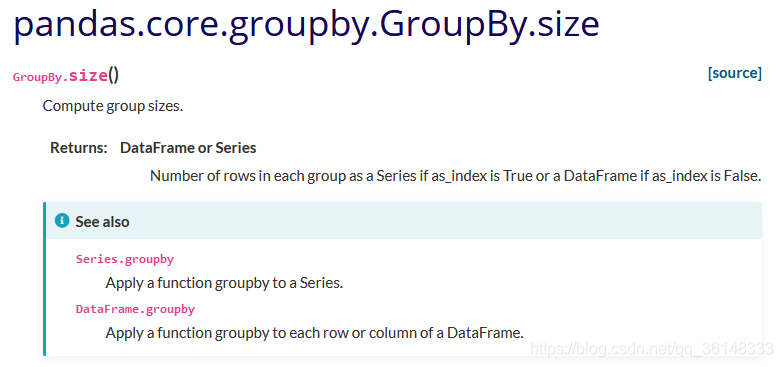

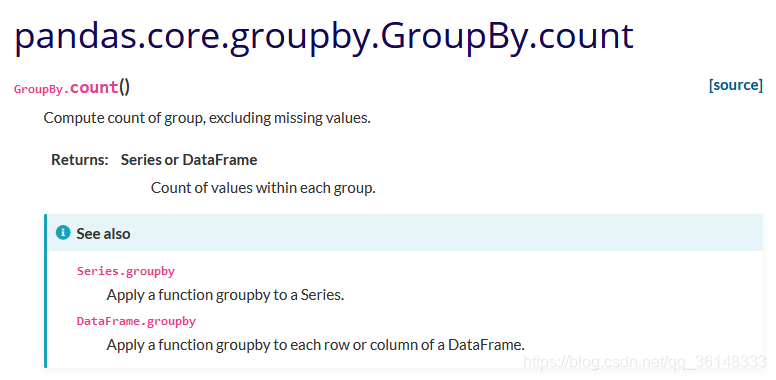

#np.cumsum函数 累加作用


numpy.cumsum(a, axis=None, dtype=None, out=None)

axis=0，按照行累加。

axis=1，按照列累加。

axis不给定具体值，就把numpy数组当成一个一维数组。


In [12]:
import numpy as np
a = np.array([[1,2,3], [4,5,6]])#没有指定轴参数(axis)！输出就变成1维数组了
np.cumsum(a,axis=0) #按照行累加，行求和
np.cumsum(a,axis=1) #按照列累加，列求和 
np.cumsum(a, dtype=float) # 指定输出类型

array([ 1.,  3.,  6., 10., 15., 21.])

# 一维数组和一个标量的区别

In [1]:
import numpy as np
x= np.array((0, ))
print(x)
y =np.array((0))
print(y)

[0]
0


# 分桶（buckets）
https://python.freelycode.com/contribution/detail/1749

In [9]:
import numpy as np
import pandas as pd

df = pd.DataFrame(data = np.random.randint(0,150,size = (20,3)),
 columns=['Python','Tensorflow','Keras'])
print(df)
# 1、等宽分箱
# 就是变量取值的每个区间的宽度是相等的，即最小值最大值的差值要小于某个数字，这个数字就叫做箱子的宽度。
pd.cut(df.Python,bins = 3)

    Python  Tensorflow  Keras
0       52          31     63
1       67           9     60
2      109         118    121
3      138         140    147
4       16          11    148
5       91         105     38
6       23         103     93
7       31          89     58
8        9          98     85
9      118          67    115
10      61          93     54
11       5          60     54
12      68         120     81
13      85           6     75
14      84          16    122
15      27         126    107
16      11          38     55
17      48          80     71
18      67          85     37
19     133          30    149


0     (49.333, 93.667]
1     (49.333, 93.667]
2      (93.667, 138.0]
3      (93.667, 138.0]
4      (4.867, 49.333]
5     (49.333, 93.667]
6      (4.867, 49.333]
7      (4.867, 49.333]
8      (4.867, 49.333]
9      (93.667, 138.0]
10    (49.333, 93.667]
11     (4.867, 49.333]
12    (49.333, 93.667]
13    (49.333, 93.667]
14    (49.333, 93.667]
15     (4.867, 49.333]
16     (4.867, 49.333]
17     (4.867, 49.333]
18    (49.333, 93.667]
19     (93.667, 138.0]
Name: Python, dtype: category
Categories (3, interval[float64]): [(4.867, 49.333] < (49.333, 93.667] < (93.667, 138.0]]

In [10]:
# 指定宽度分箱
pd.cut(df.Keras,#分箱数据
 bins = [0,60,90,120,150],#分箱断点
 right = False,# 左闭右开
 labels=['不及格','中等','良好','优秀'])# 分箱后分类

0      中等
1      中等
2      优秀
3      优秀
4      优秀
5     不及格
6      良好
7     不及格
8      中等
9      良好
10    不及格
11    不及格
12     中等
13     中等
14     优秀
15     良好
16    不及格
17     中等
18    不及格
19     优秀
Name: Keras, dtype: category
Categories (4, object): ['不及格' < '中等' < '良好' < '优秀']

In [11]:
# 2、等频分箱
pd.qcut(df.Python,q = 4,# 4等分
 labels=['差','中','良','优']) # 分箱后分类

0     中
1     良
2     优
3     优
4     差
5     优
6     差
7     中
8     差
9     优
10    中
11    差
12    良
13    良
14    良
15    中
16    差
17    中
18    良
19    优
Name: Python, dtype: category
Categories (4, object): ['差' < '中' < '良' < '优']

## np.outer
numpy中的outer定义和向量外积有所不同

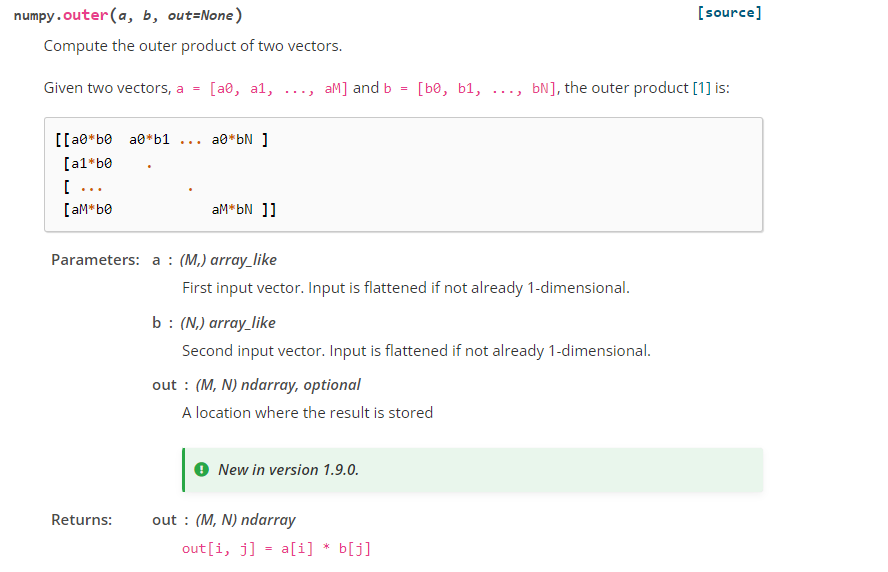

In [4]:
import numpy as np

# eg1:
x1 = [1,2,3]
x2 = [4,5,6]
outer = np.outer(x1,x2)
print(outer)

# eg2:
x1 = [[1,2],[3,4]]
x2 = [[1,1],[1,1]]
outer = np.outer(x1,x2)
print(outer)

# eg3:
x = np.array(['a', 'b', 'c'], dtype=object)
outer = np.outer(x, [1, 2, 3])
print(outer)

[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]
 [4 4 4 4]]
[['a' 'aa' 'aaa']
 ['b' 'bb' 'bbb']
 ['c' 'cc' 'ccc']]


### pandas.get_dummies 的用法

In [12]:
import pandas as pd
df = pd.DataFrame([  
            ['green' , 'A'],   
            ['red'   , 'B'],   
            ['blue'  , 'A']])  

df.columns = ['color',  'class'] 
df

,color,class
0,green,A
1,red,B
2,blue,A


In [13]:
pd.get_dummies(df) 

,color_blue,color_green,color_red,class_A,class_B
0,0,1,0,1,0
1,0,0,1,0,1
2,1,0,0,1,0


可以对指定列进行get_dummies

In [14]:
pd.get_dummies(df.color)

,blue,green,red
0,0,1,0
1,0,0,1
2,1,0,0


将指定列进行get_dummies 后合并到元数据中

In [15]:
df = df.join(pd.get_dummies(df.color)).drop(columns='color') 
df

,class,blue,green,red
0,A,0,1,0
1,B,0,0,1
2,A,1,0,0
